<a href="https://colab.research.google.com/github/JCherryA050/Hello_ds/blob/master/fsm_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Simple Model

This notebook is concerning the First Simple Model as a proof of concept and an initial prediction of the data.


In [ ]:
# Standard Imports
import numpy as np

# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Importing local functions
# from src import eval_plots
import os, shutil
# Setting the random seed for reproducability
np.random.seed(123)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/histo_all_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [ ]:
from glob import glob
data = glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive=True)

In [ ]:
# Checking to see if all of the data is accounted for
len(data)

277524

In [ ]:
# Separating the IDC-positive and IDC-negative images
class0 = []
class1 = []
for datum in data:
    if datum.endswith('class0.png'):
        class0.append((datum.replace(os.path.basename(datum),''),os.path.basename(datum)))
    else:
        class1.append((datum.replace(os.path.basename(datum),''),os.path.basename(datum)))


In [ ]:
# Setting up the directory system for copying over files
data_dir = '/content/IDC_regular_ps50_idx5/'
new_dir = 'split/'

In [ ]:
# Making the new split directory in the output
os.mkdir(new_dir)

FileExistsError: ignored

In [ ]:
train_folder = os.path.join('./split', 'train')
train_pos  = os.path.join(train_folder, 'positive')
train_neg = os.path.join(train_folder, 'negative')


test_folder = os.path.join('./split', 'test')
test_pos  = os.path.join(test_folder, 'positive')
test_neg = os.path.join(test_folder, 'negative')

val_folder = os.path.join('./split', 'validation')
val_pos  = os.path.join(val_folder, 'positive')
val_neg = os.path.join(val_folder, 'negative')

In [ ]:
os.mkdir(test_folder)
os.mkdir(test_pos)
os.mkdir(test_neg)

os.mkdir(train_folder)
os.mkdir(train_pos)
os.mkdir(train_neg)

os.mkdir(val_folder)
os.mkdir(val_pos)
os.mkdir(val_neg)

FileExistsError: ignored

In [ ]:
# train IDC-positive
imgs = class1[:int(np.round(len(class1)*0.6,0))]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(train_pos, img[1])
    shutil.copyfile(origin, destination)

# validation IDC-positive
imgs = class1[int(np.round(len(class1)*0.6,0)):int(np.round(len(class1)*0.8,0))]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(val_pos, img[1])
    shutil.copyfile(origin, destination)

# test IDC-positive
imgs = class1[int(np.round(len(class1)*0.8,0)):]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(test_pos, img[1])
    shutil.copyfile(origin, destination)

KeyboardInterrupt: ignored

In [ ]:
# train IDC-negative
imgs = class0[:int(np.round(len(class0)*0.6,0))]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(train_neg, img[1])
    shutil.copyfile(origin, destination)

# test IDC-negative
imgs = class0[int(np.round(len(class0)*0.6,0)):int(np.round(len(class0)*0.8,0))]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(test_neg, img[1])
    shutil.copyfile(origin, destination)

# validation IDC-negative
imgs = class0[int(np.round(len(class0)*0.8,0)):]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(val_neg, img[1])
    shutil.copyfile(origin, destination)

In [ ]:
print('There are', len(os.listdir(train_neg))+len(os.listdir(train_pos)), 'IDC-negative images in the training set')
print('There are', len(os.listdir(val_neg))+len(os.listdir(val_pos)), 'IDC-negative images in the validation set')
print('There are', len(os.listdir(test_neg))+len(os.listdir(test_pos)), 'IDC-negative images in the test set')

### Initializing the paths to the data directories.

### Setting up the Image Data Flow

In [ ]:
# set up batch generator for train set with 1000 as the batch size
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(100, 100), 
        batch_size = 512,class_mode='binary',shuffle=False)

# set up batch generator for test set with 1000 as the batch size
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(100, 100), 
        batch_size = 32,class_mode='binary',shuffle=False) 

# set up batch generator for validation set with 1000 as the batch size
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(100, 100), 
        batch_size = 32,class_mode='binary',shuffle=False)


Found 166515 images belonging to 2 classes.
Found 55504 images belonging to 2 classes.
Found 55505 images belonging to 2 classes.


### Initializing Early stopping and model checkpoints

In [ ]:
# Creating admin tools for the models like automatic saving checkpoints, early stopping routines, etc.
checkpoint = ModelCheckpoint("fsm.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)

early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=4,
                      verbose=1,
                      mode='auto')



### Define the First Simple Model

- The FSM is a simple model with 4 convolutional layers and accompanying pooling layers. Adam is used as the optimizer with a lerning rate of 1e-4.

In [ ]:
def first_simple():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    # model.add(layers.MaxPooling2D((2, 2)))
    # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # model.add(layers.MaxPooling2D((2, 2)))
    # model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    # model.add(layers.MaxPooling2D((2, 2)))
    # model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    # model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))    
    
    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    
    print(model.summary())
    return model

### Displaying the model summary and running the model using 100 epochs and a low ````steps_per_epoch```` count to ensure the model runs.

In [ ]:
# set the model as the first simple model
model = first_simple()

# Fit the model to the train data
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=100,
                    validation_data=val_generator,
                    callbacks=[checkpoint,early],
                    )#class_weight=weights

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               78676224  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 78,677,377
Trainable params: 78,677,377
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
100/100 [==============================] - 992s 10s/step - loss: 2.6385 - acc: 0.6945 - val_loss: 0.5897 - val_acc: 0.7161

Epoch 00001: val_acc improved from -inf to 0.71612, saving model to fsm.h5
Epoch 2/100
100/100 [===

## Evaluating the Model

- The accuracy is taking for the test set.
- The accuracy curve and loss curve are analyzed to ensure weights are learned
- Predictions are made on the test set and a confusion matrix is plotted along with recall, precision, accuracy, and f1-score to determine performance

In [ ]:
# Test results of the Model on train data 
loss_train,accuracy_train = model.evaluate(val_generator)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

NameError: name 'model' is not defined

In [ ]:
# Test results of the Model on test data
loss_test,accuracy_test = model.evaluate(test_generator)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

1735/1735 [==============================] - 25s 14ms/step - loss: 0.5844 - acc: 0.7264
Model has an accuracy of 0.7263801097869873 with a loss of 0.5844181776046753 on the test subset.


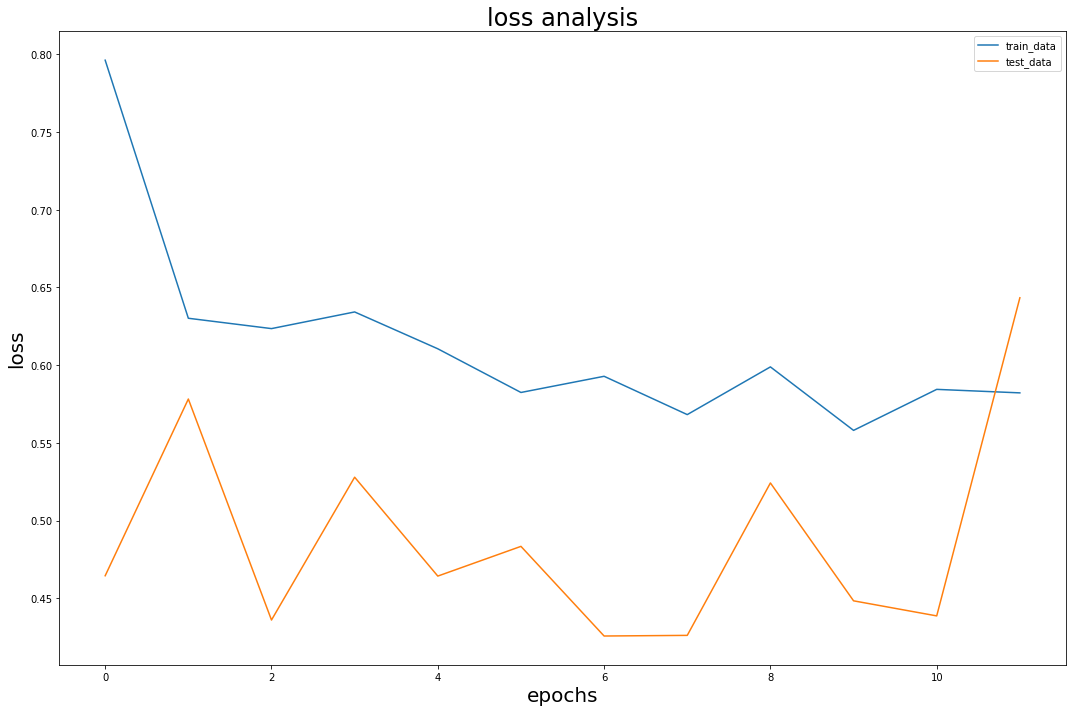

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_loss.png')

plt.show()

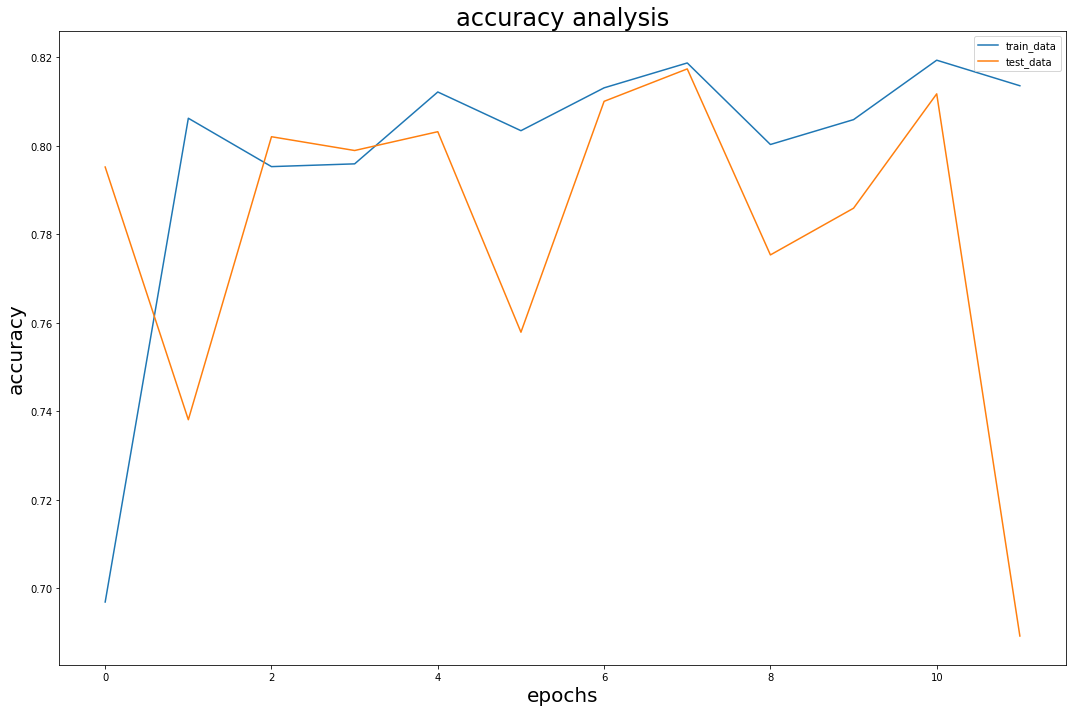

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_acc.png')
plt.show()

In [ ]:
model.predict(test_generator)

array([[0.15581864, 0.83723956],
       [0.10082308, 0.8930737 ],
       [0.07699058, 0.9207874 ],
       ...,
       [0.5129179 , 0.49375516],
       [0.20288092, 0.794462  ],
       [0.87930673, 0.12254521]], dtype=float32)

In [ ]:
y_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_predicts = np.argmin(model.predict(test_generator),axis=1)
y_labels  = test_generator.labels

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

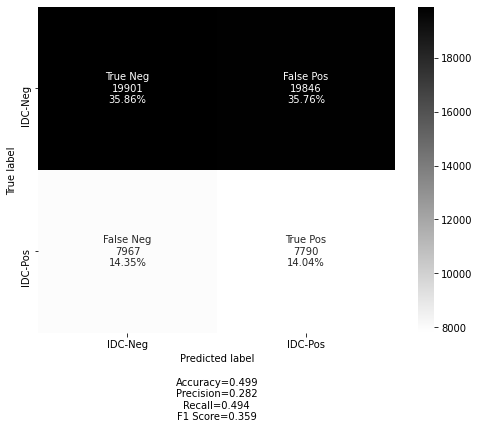

In [ ]:
cf_matrix = confusion_matrix(y_labels,y_predicts)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['IDC-Neg', 'IDC-Pos']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                      figsize=(8,6))

#### The Accuracy is lower than indicated in the modeling. The above metrics seem correct as the data has a large imballance in favor of IDC-negative. A model that would give a negative prediction would be correct about 66% of the time.

## First Iteration: Training with class weights

- to address the class imballance, I decidied to incorporate class weights within the model.
- i am also increasing the steps_per_epoch arg to include more of the data

In [ ]:
# Creating admin tools for the models like automatic saving checkpoints, early stopping routines, etc.
checkpoint = ModelCheckpoint("denseNet201.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)

early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=4,
                      verbose=1,
                      mode='auto')
weights = {0:1,
           1:2}

In [ ]:
from tensorflow.keras.applications import DenseNet201

def second_simple(backbone, lr=1e-3):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    opt = Adam(lr=lr)# beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    print(model.summary())
    return model

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(100,100,3)
)

In [ ]:
# set the model as the first simple model
model2 = second_simple(resnet)

# Fit the model to the train data
history = model.fit(train_generator,
                    epochs = 20,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    callbacks=[checkpoint],
                    class_weight=weights)#

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 3, 3, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1920)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1920)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1920)              7680      
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 3842      
Total params: 18,333,506
Trainable params: 18,100,610
Non-trainable params: 232,896
_________________________________________________________________
None
Epoch 1/20
10/10 [==============================] - 24s 3s/step - loss: 0.4118 - acc: 0.8687 - v

KeyboardInterrupt: 

## Evaluation

In [ ]:
# Test results of the Model on test data
loss_test,accuracy_test = model2.evaluate(test_generator)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

1735/1735 [==============================] - 75s 40ms/step - loss: 0.8081 - acc: 0.5284
Model has an accuracy of 0.5259260535240173 with a loss of 0.8078410029411316 on the test subset.


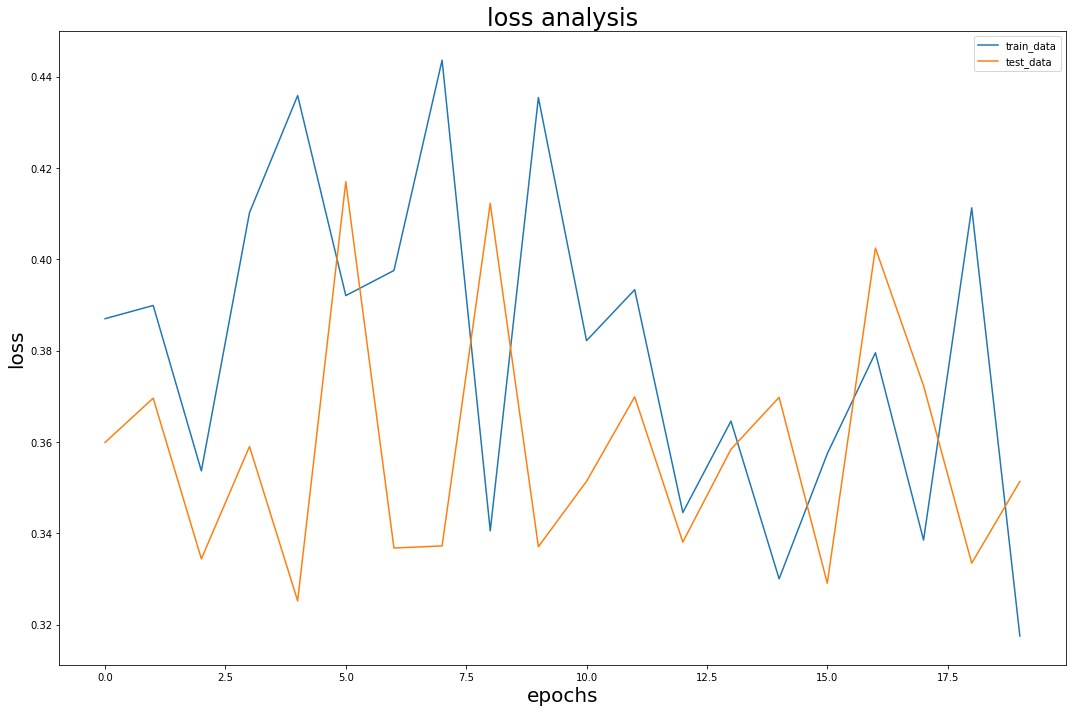

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_loss.png')

plt.show()

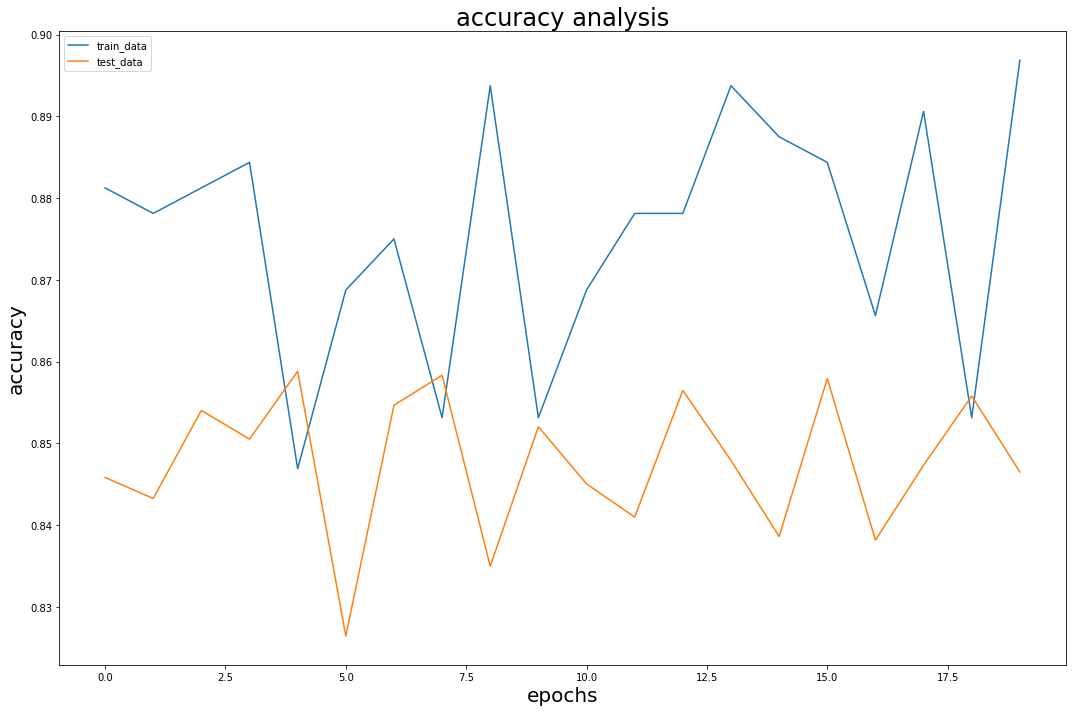

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_acc.png')
plt.show()

In [ ]:
y_predicts = np.argmax(model2.predict(test_generator),axis=1)
y_labels  = test_generator.labels

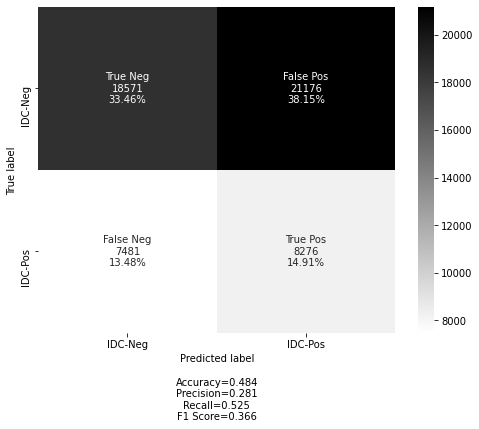

In [ ]:
cf_matrix = confusion_matrix(y_labels,y_predicts)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['IDC-Neg', 'IDC-Pos']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                      figsize=(8,6))

#### The Accuracy is lower than indicated in the modeling. The above metrics seem correct as the data has a large imballance in favor of IDC-negative. A model that would give a negative prediction would be correct about 66% of the time.

In [ ]:
# # set the model as the first simple model
# enb0 = modelEfficientNetB0()

# # Fit the model to the train data
# history = enb0.fit(train_images,
#                     train_labels,
#                     epochs=100,
#                     batch_size=32,
#                     validation_data=(val_images,val_labels))#

### Test Metrics

In [ ]:
# # Test results of the Model on train data 
# loss_train,accuracy_train = enb0.evaluate(train_images, train_labels)
# print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

In [ ]:
# # Test results of the Model on test data
# loss_test,accuracy_test = enb0.evaluate(test_images, test_labels)
# print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

In [ ]:
# fig, ax = plt.subplots(figsize = (15,10))
# ax.plot(history.history['loss'])
# ax.plot(history.history['val_loss'])
# ax.set_xlabel('epochs', size = 20)
# ax.set_ylabel('loss', size = 20)
# ax.legend(['train_data','test_data'])
# ax.set_title('loss analysis',size = 24)
# plt.tight_layout()
# fig.savefig('effNetB0_loss.png')

# plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize=(15,10))

# ax.plot(history.history['acc'])
# ax.plot(history.history['val_acc'])
# ax.set_xlabel('epochs',size = 20)
# ax.set_ylabel('accuracy',size = 20)
# ax.legend(['train_data','test_data'])
# ax.set_title('accuracy analysis',size = 24)
# plt.tight_layout()
# fig.savefig('effNetB0_acc.png')
# plt.show()

In [ ]:
# y_predicts = np.argmax(enb0.predict(test_images),axis=1)
# y_labels  = np.argmax(test_labels,axis=1)

In [ ]:
# cf_matrix = confusion_matrix(y_labels,y_predicts)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# categories = ['IDC-Neg', 'IDC-Pos']
# make_confusion_matrix(cf_matrix, 
#                       group_names=labels,
#                       categories=categories, 
#                       cmap='binary',
#                       figsize=(8,6))